# Timesfm-2.5 Usage Example

## Loading Timesfm-2.5 Model

In [1]:
import numpy as np
import os
import sys

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
print(f"src_path: {src_path}")

from samay.model import TimesFM_2p5_Model
from samay.dataset import TimesFM_2p5_Dataset
from samay.utils import load_args, visualize

arg_path = "../config/timesfm_2p5.json"
args = load_args(arg_path)
model = TimesFM_2p5_Model(**args)

src_path: /nethome/sli999/Samay/src


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
INFO:p-2571648:t-140554484422464:timesfm_2p5_torch.py:_from_pretrained:Downloading checkpoint from Hugging Face repo google/timesfm-2.5-200m-pytorch
INFO:p-2571648:t-140554484422464:timesfm_2p5_torch.py:_from_pretrained:Loading checkpoint from: /nethome/sli999/.cache/huggingface/hub/models--google--timesfm-2.5-200m-pytorch/snapshots/1d952420fba87f3c6dee4f240de0f1a0fbc790e3/model.safetensors


Compiling model...


## Define the datasets. 

In [2]:
train_dataset = TimesFM_2p5_Dataset(name="ETTh1", freq='H', datetime_col='date', path='../data/data/ETTh1.csv',
                             mode='train', batch_size=32, context_len=512, horizon_len=96, task_name="finetune")
val_dataset = TimesFM_2p5_Dataset(name="ETTh1", freq='H', datetime_col='date', path='../data/data/ETTh1.csv',
                             mode='test', batch_size=128, context_len=512, horizon_len=96)

## Evaluate the zero-shot forecasting

In [3]:
metric, trues, preds, histories, quantiles = model.evaluate(val_dataset)
print(metric)

{'mse': 10.653754, 'mae': 1.6734995, 'mase': 1.9601089183980904, 'mape': 1066.4965, 'rmse': 3.264009, 'nrmse': 0.07108186979595603, 'smape': 0.4265423, 'msis': 0.05400973, 'nd': 0.4495854563468765, 'mwsq': 1.8774203444529338, 'crps': 0.6567117515837007}


## Visualize the zero-shot results. 

(462, 7, 512)


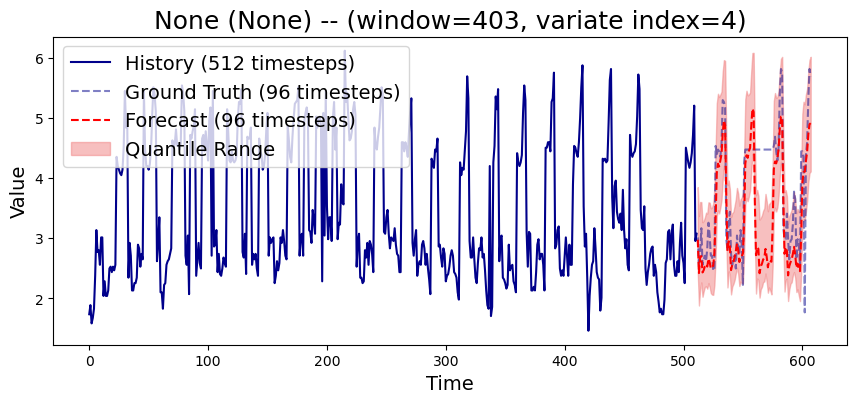

In [4]:
visualize(trues=trues, preds=preds, history=histories, context_len=512, quantiles=quantiles)

## Finetune the model  

In [5]:
model.finetune(train_dataset)

Epoch 0, Loss: 2.3359
Epoch 1, Loss: 1.4200
Epoch 2, Loss: 1.1345
Epoch 3, Loss: 0.9683
Epoch 4, Loss: 0.8621


## Evaluate the model after finetune 

In [6]:
metric, trues, preds, histories = model.evaluate(val_dataset)
print(metric)

ValueError: too many values to unpack (expected 4)